In [1]:
import cv2
import matplotlib.pyplot as plt
from work.DepthCalculation import DepthCalculation, Status
from work.DepthEstimation import depthEstimation
from work.Yolo import findObject, Object, jsonToObject
from work.util import crop
import numpy as np
%matplotlib inline

pygame 2.1.2 (SDL 2.0.18, Python 3.9.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


/Users/hugocianciolo/IdeaProjects/memoire-python/venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using cache found in /Users/hugocianciolo/.cache/torch/hub/intel-isl_MiDaS_master


Loading weights:  None


Using cache found in /Users/hugocianciolo/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master
Using cache found in /Users/hugocianciolo/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /Users/hugocianciolo/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-5-1 torch 1.11.0 CPU

Fusing layers... 
YOLOv5l summary: 367 layers, 46533693 parameters, 0 gradients
Adding AutoShape... 


In [2]:
img = cv2.imread('middle.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
result = findObject(img)

In [4]:
objects = jsonToObject(result)

In [5]:
output = depthEstimation(img)

In [6]:
print(np.amax(output))

255


In [7]:
object = Object(**objects[0])

In [8]:
output = crop(output, object)

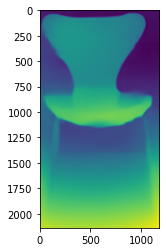

In [9]:
plt.imshow(output)

In [11]:
index = np.unravel_index(np.argmax(output), output.shape)
print(index)

(2131, 1177)


In [13]:
print(output[1100, 500])

90
